In [1]:
# pip install pesq pysoundfile pooch

## SDR (Signal to Distortion Ratio)

In [2]:
import librosa
original, sr_original = librosa.load("C:\Users\Jaswanth Kakani\OneDrive\Desktop\outputvoices\professor zhang 44.wav", sr=None)
cloned, sr_cloned = librosa.load("C:\Users\Jaswanth Kakani\OneDrive\Desktop\outputvoicesbark_out.wav", sr=None)


In [3]:
import numpy as np
def calculate_sdr(original, cloned):
    # Ensure both audio signals have the same length
    min_length = min(len(original), len(cloned))
    original = original[:min_length]
    cloned = cloned[:min_length]

    # Calculate SDR
    error_signal = original - cloned
    signal_power = np.square(original).mean()
    distortion_power = np.square(error_signal).mean()
    sdr = 10 * np.log10(signal_power / distortion_power)
    return sdr

# Usage:
sdr = calculate_sdr(original, cloned)
print(f"SDR: {sdr} dB")

SDR: -2.3622652888298035 dB


3.79 dB indicates that the distortion in the cloned audio signal is greater than the original signal by approximately 3.79 decibels.

In [7]:
import librosa
original, sr_original = librosa.load("C:\Users\Jaswanth Kakani\OneDrive\Desktop\outputvoices\harsha_voice.wav", sr=None)
cloned, sr_cloned = librosa.load("C:\Users\Jaswanth Kakani\OneDrive\Desktop\outputvoices\harsha_output.wav", sr=None)

In [12]:
# Usage:
sdr = calculate_sdr(original, cloned)
print(f"SDR: {sdr} dB")

SDR: -5.2644360065460205 dB


In [17]:

original, sr_original = librosa.load("C:\Users\Jaswanth Kakani\OneDrive\Desktop\outputvoices\ayush.wav", sr=None)
cloned, sr_cloned = librosa.load("C:\Users\Jaswanth Kakani\OneDrive\Desktop\outputvoices\ayush voice out.wav", sr=None)
# Usage:
sdr = calculate_sdr(original, cloned)
print(f"SDR: {sdr} dB")

SDR: -4.228830337524414 dB


## PESQ (Perceptual Evaluation of Speech Quality)


Here's a rough interpretation of PESQ scores:

Below 1.0: Very poor speech quality.

1.0 to 2.0: Poor speech quality.

2.0 to 3.0: Fair speech quality.

3.0 to 4.0: Good speech quality.

Above 4.0: Very good to excellent speech quality.


It provides a numerical score indicating the similarity between the original and generated voices.

In [3]:
import pesq

In [4]:
def calc_pesq(original,cloned):
    # Load the reference and degraded audio signals
    ref, sr_ref = librosa.load(original, sr=None)
    deg, sr_deg = librosa.load(cloned, sr=None)
    # Ensure both signals have the same sample rate (common_sample_rate)
    common_sample_rate = 16000  # Set your desired sample rate

    # Calculate the PESQ score
    pesq_score = pesq.pesq(common_sample_rate, ref, deg, 'wb')
    return pesq_score

In [8]:
# Prof Voice
original = "C:\Users\Jaswanth Kakani\OneDrive\Desktop\outputvoices\professor zhang 44.wav"
cloned = "C:\Users\Jaswanth Kakani\OneDrive\Desktop\outputvoices\bark_out.wav"
pesq_score = calc_pesq(original,cloned)
print(f"PESQ Score: {pesq_score:.2f}")

PESQ Score: 1.04


In [9]:
# Aayush Voice
original = "C:\Users\Jaswanth Kakani\OneDrive\Desktop\outputvoices\harsha_voice.wav"
cloned =   "C:\Users\Jaswanth Kakani\OneDrive\Desktop\outputvoices\harsha_output.wav"
pesq_score = calc_pesq(original,cloned)
print(f"PESQ Score: {pesq_score:.2f}")

PESQ Score: 2.53


In [18]:
##just for testing using aayush voice
# Aayush Voice
original = "C:\Users\Jaswanth Kakani\OneDrive\Desktop\outputvoices\ayush.wav"
cloned = "C:\Users\Jaswanth Kakani\OneDrive\Desktop\outputvoices\ayush voice out.wav"
pesq_score = calc_pesq(original,cloned)
print(f"PESQ Score: {pesq_score:.2f}")

PESQ Score: 1.04


In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


In [8]:
# Function to plot mel spectrogram
def plot_mel_spectrogram(audio, title):
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr_original)
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_mel_spec, sr=sr_original, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

In [9]:

# File paths
original_path = "C:\Users\Jaswanth Kakani\OneDrive\Desktop\outputvoices\professor zhang 44.wav"
cloned_path = "C:\Users\Jaswanth Kakani\OneDrive\Desktop\outputvoices\bark_out.wav"

# Load audio signals
original, sr_original = librosa.load(original_path, sr=None)
cloned, sr_cloned = librosa.load(cloned_path, sr=None)

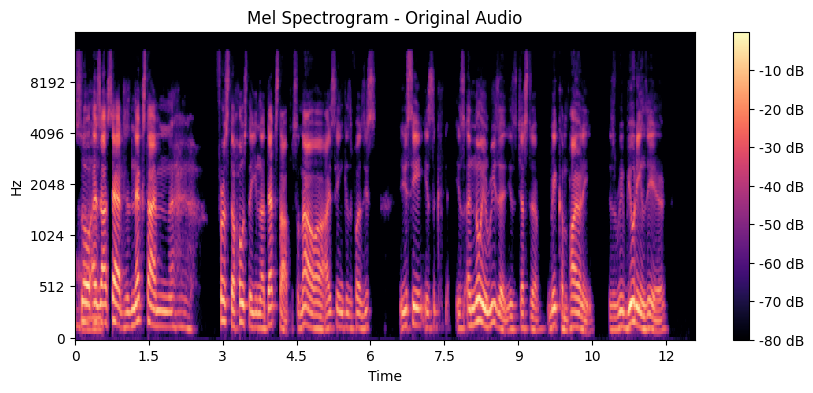

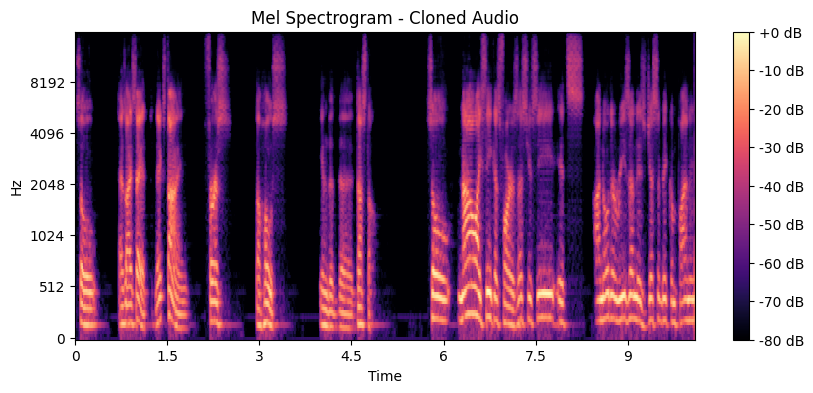

In [10]:
# Plot mel spectrogram for the original audio
plot_mel_spectrogram(original, title="Mel Spectrogram - Original Audio")

# Plot mel spectrogram for the cloned audio
plot_mel_spectrogram(cloned, title="Mel Spectrogram - Cloned Audio")

In [15]:

# File paths
original_path = "C:\Users\Jaswanth Kakani\OneDrive\Desktop\outputvoices\harsha_voice.wav"
cloned_path = "C:\Users\Jaswanth Kakani\OneDrive\Desktop\outputvoices\harsha_output.wav"

# Load audio signals
original, sr_original = librosa.load(original_path, sr=None)
cloned, sr_cloned = librosa.load(cloned_path, sr=None)

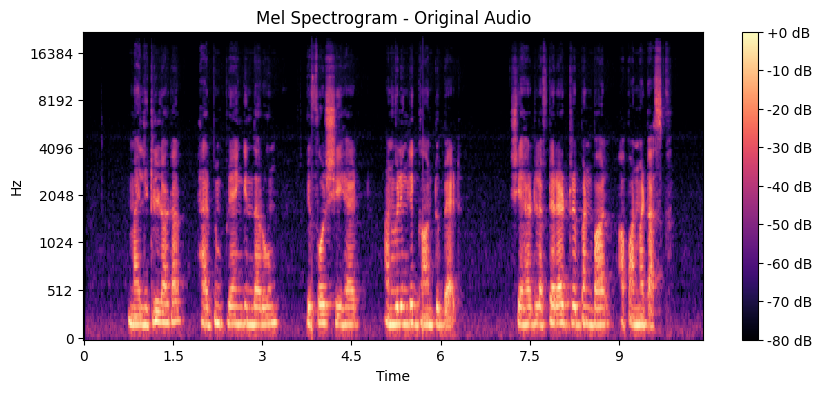

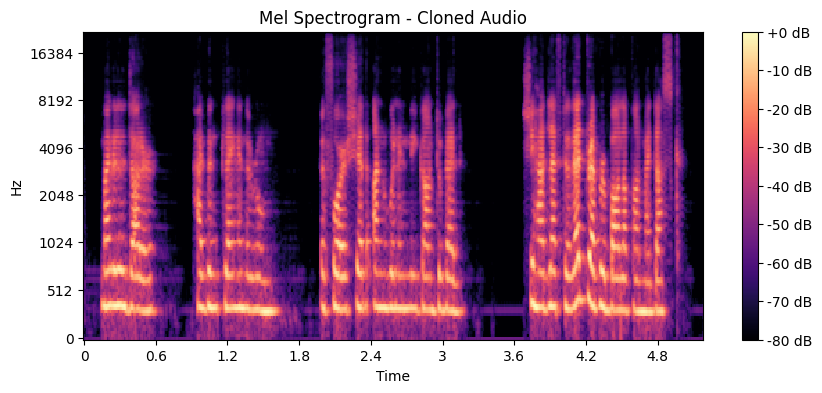

In [16]:
# Plot mel spectrogram for the original audio
plot_mel_spectrogram(original, title="Mel Spectrogram - Original Audio")

# Plot mel spectrogram for the cloned audio
plot_mel_spectrogram(cloned, title="Mel Spectrogram - Cloned Audio")

In [19]:

# File paths
original_path = "C:\Users\Jaswanth Kakani\OneDrive\Desktop\outputvoices\ayush.wav"
cloned_path = "C:\Users\Jaswanth Kakani\OneDrive\Desktop\outputvoices\ayush voice out.wav"

# Load audio signals
original, sr_original = librosa.load(original_path, sr=None)
cloned, sr_cloned = librosa.load(cloned_path, sr=None)

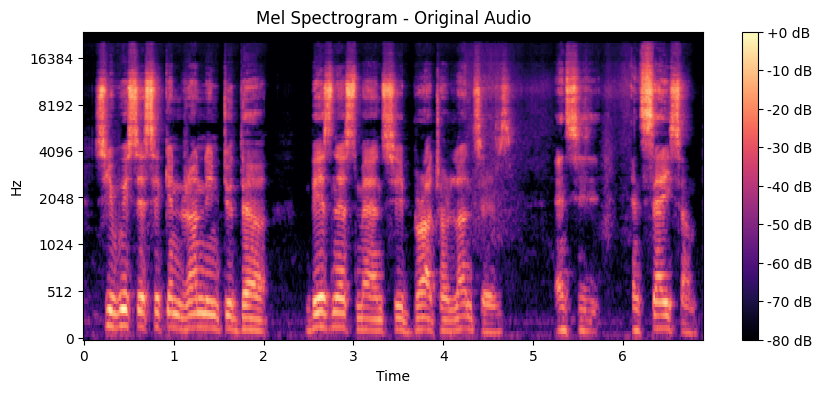

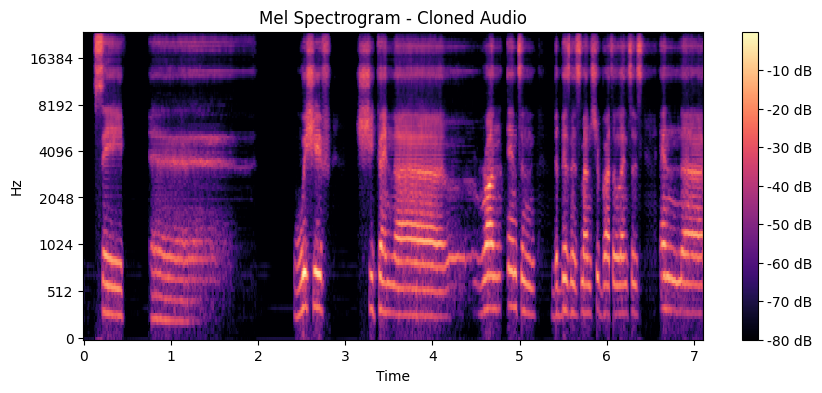

In [20]:
# Plot mel spectrogram for the original audio
plot_mel_spectrogram(original, title="Mel Spectrogram - Original Audio")

# Plot mel spectrogram for the cloned audio
plot_mel_spectrogram(cloned, title="Mel Spectrogram - Cloned Audio")